<a href="https://colab.research.google.com/github/st091150/python/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import requests as rs
import pandas as pd
from bs4 import BeautifulSoup
import lxml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


url_ru = 'https://smart-lab.ru/q/shares_fundamental/'
url_div_ru = 'https://smart-lab.ru/q/Shares/'
url_betaes = 'https://ru.tradingview.com/markets/stocks-russia/market-movers-high-beta/'

html_data_ru = BeautifulSoup(rs.get(url_ru).text)
html_div_ru = BeautifulSoup(rs.get(url_div_ru).text)
html_betaes = BeautifulSoup(rs.get(url_betaes).text)

main_table_ru = html_data_ru.find('table', class_ = "simple-little-table little trades-table")

main_table_div_ru = html_div_ru.find('table', class_ = "simple-little-table trades-table")

main_table_betaes = html_betaes.find('table', class_ = "table-8MglMQUg")

headers = []
headers_div = []
headers_betaes = []

for i in main_table_ru.find_all('th'):
  headers.append(i.text)

for i in main_table_div_ru.find_all('th')[0:]:
  headers_div.append(i.text)

for i in main_table_betaes.find_all('th')[0:]:
  headers_betaes.append(i.text)

data_ru = pd.DataFrame(columns = headers)
data_div_ru = pd.DataFrame(columns=headers_div)
data_betaes = pd.DataFrame(columns=headers_betaes)

for i in main_table_ru.find_all('tr')[1:]:
  row_data = i.find_all('td')
  row = [i.text for i in row_data]
  length = len(data_ru)
  data_ru.loc[length] = row

for i in main_table_div_ru.find_all('tr')[1:]:
  row_data = i.find_all('td')
  row = [i.text for i in row_data]
  length = len(data_div_ru)
  data_div_ru.loc[length] = row

for i in main_table_betaes.find_all('tr')[1:]:
  row_data = i.find_all('td')
  row = [i.text for i in row_data]
  length = len(data_betaes)
  data_betaes.loc[length] = row

data_ru = data_ru.loc[:,('Название','Тикер','Капит-я млрд руб','P/E','долг/EBITDA')]
data_betaes = data_betaes.loc[:,('Тикер','Бета 1 г.')]
data_betaes['Тикер'] = [i[0:4] for i in data_betaes['Тикер']]

data_ru = pd.merge(data_ru,data_div_ru[['Тикер','Цена, посл']],left_on='Тикер', right_on='Тикер')
df = pd.merge(data_ru,data_betaes[['Тикер','Бета 1 г.']],left_on='Тикер', right_on='Тикер')

#df
  
df

,Название,Тикер,Капит-я млрд руб,P/E,долг/EBITDA,"Цена, посл",Бета 1 г.
0,Газпром,GAZP,7 021,3.4,0.8,296.6,0.62
1,Роснефть,ROSN,3 913,3.7,2.3,369.2,0.66
2,Лукойл,LKOH,2 574,3.3,0.1,3943,0.52
3,Газпромнефть,SIBN,1 946,3.9,0.2,410.45,0.47
4,Сургутнефтегаз,SNGS,1 043,1.4,-15.4,21.435,0.57
...,...,...,...,...,...,...,...
84,Астраханэнергосбыт,ASSB,1,11.9,,0.725,0.43
85,OR Group (Обувь России),ORUP,1,-0.1,-3.4,4.94,1.36
86,Фармсинтез,LIFE,1,-1.1,-0.8,3.68,0.85
87,ВХЗ,VLHZ,0,9.5,4.4,68.3,0.66


,Название,Тикер,Капит-я млрд руб,P/E,долг/EBITDA,"Цена, посл",Бета 1 г.
0,Газпром,GAZP,7 021,3.4,0.8,296.6,0.62
1,Роснефть,ROSN,3 913,3.7,2.3,369.2,0.66
2,Лукойл,LKOH,2 574,3.3,0.1,3943,0.52
3,Газпромнефть,SIBN,1 946,3.9,0.2,410.45,0.47
4,Сургутнефтегаз,SNGS,1 043,1.4,-15.4,21.435,0.57
...,...,...,...,...,...,...,...
84,Астраханэнергосбыт,ASSB,1,11.9,,0.725,0.43
85,OR Group (Обувь России),ORUP,1,-0.1,-3.4,4.94,1.36
86,Фармсинтез,LIFE,1,-1.1,-0.8,3.68,0.85
87,ВХЗ,VLHZ,0,9.5,4.4,68.3,0.66


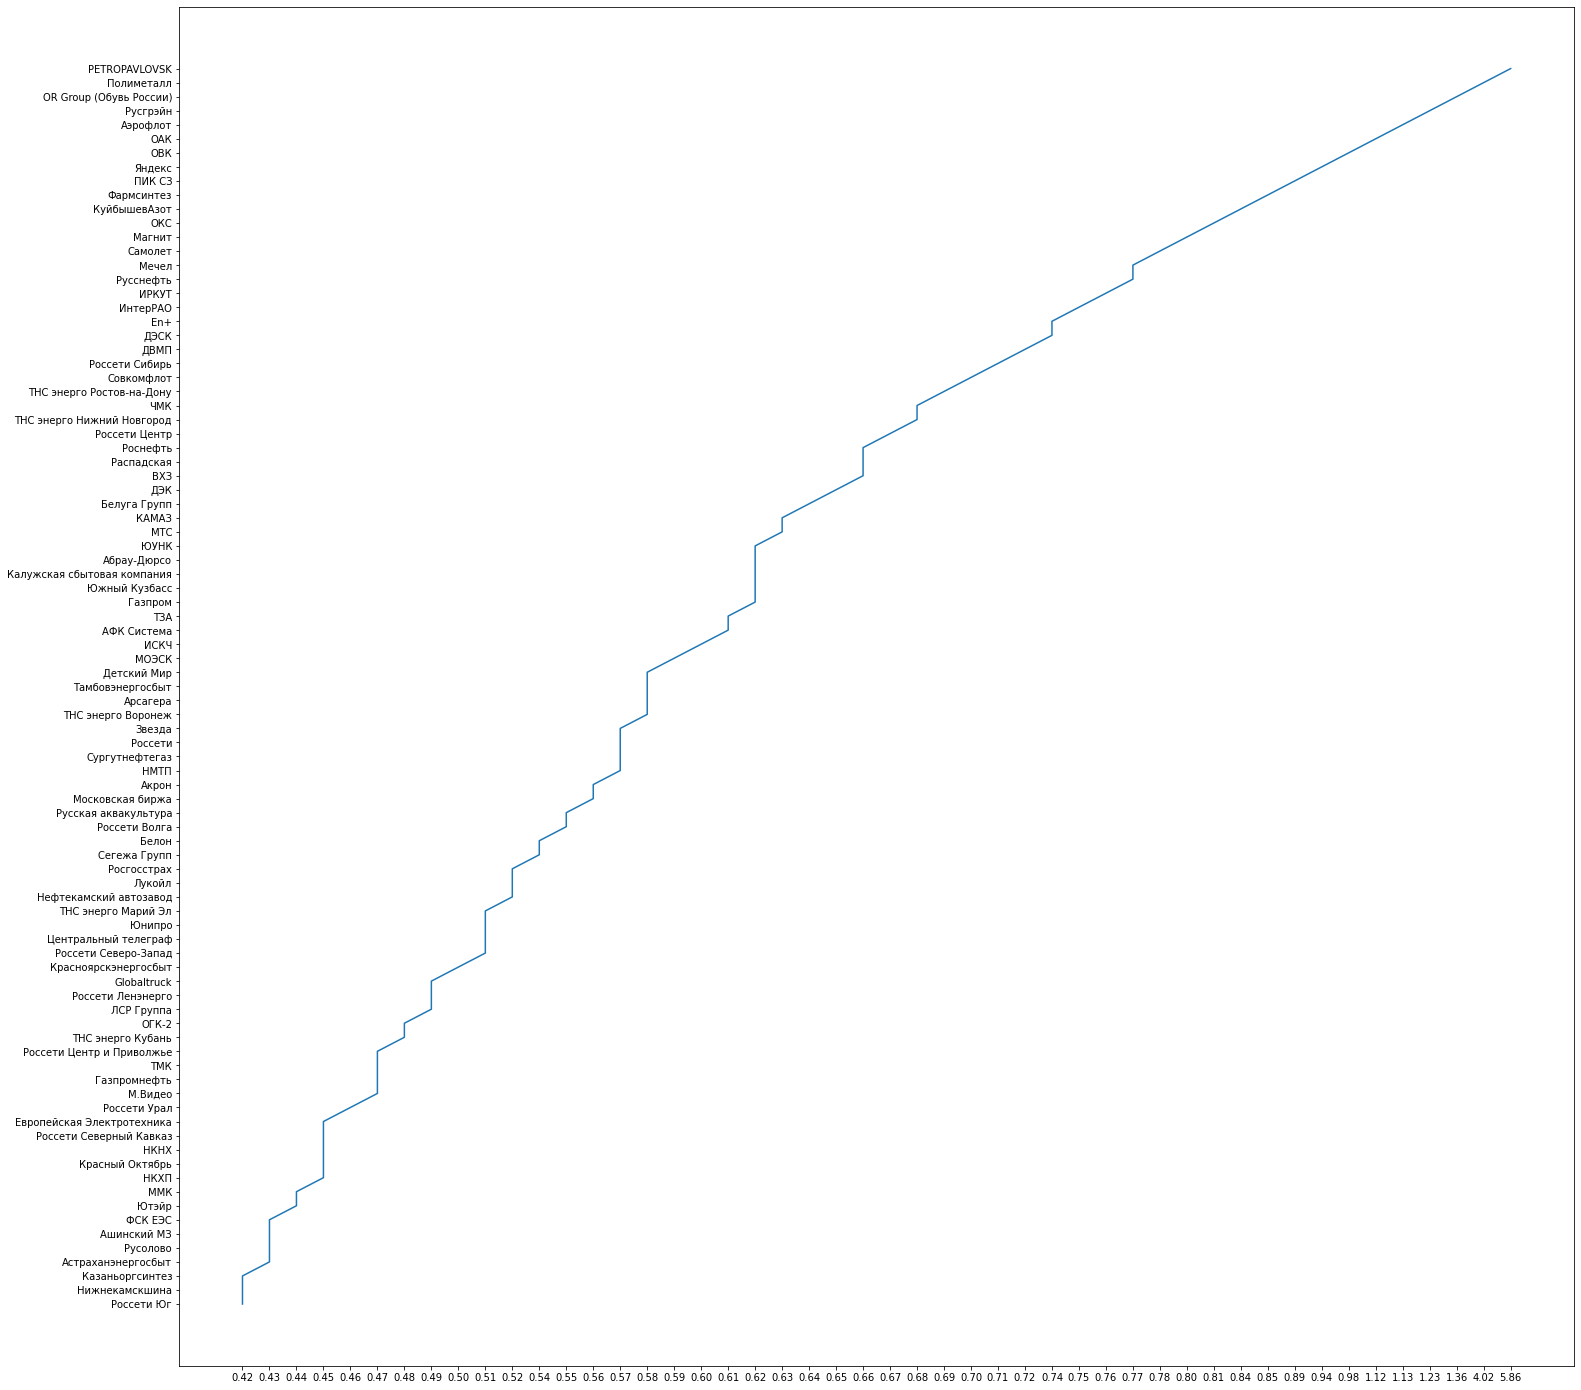

In [34]:
plt.figure(figsize=(25, 25))
plt.plot(df.sort_values(by='Бета 1 г.')['Бета 1 г.'], df.sort_values(by='Бета 1 г.')['Название'])
df

# если бета > 1 , уровень риска акции Высокий
# если бета = 1 , уровень риска акции Умеренный
# если 0< бета < 1 , уровень риска акции Низкий
# если -1< бета < 0 , уровень риска акции Низкий
# если   бета = -1 , уровень риска акции Умеренный
# если  бета < -1 , уровень риска акции Высокий

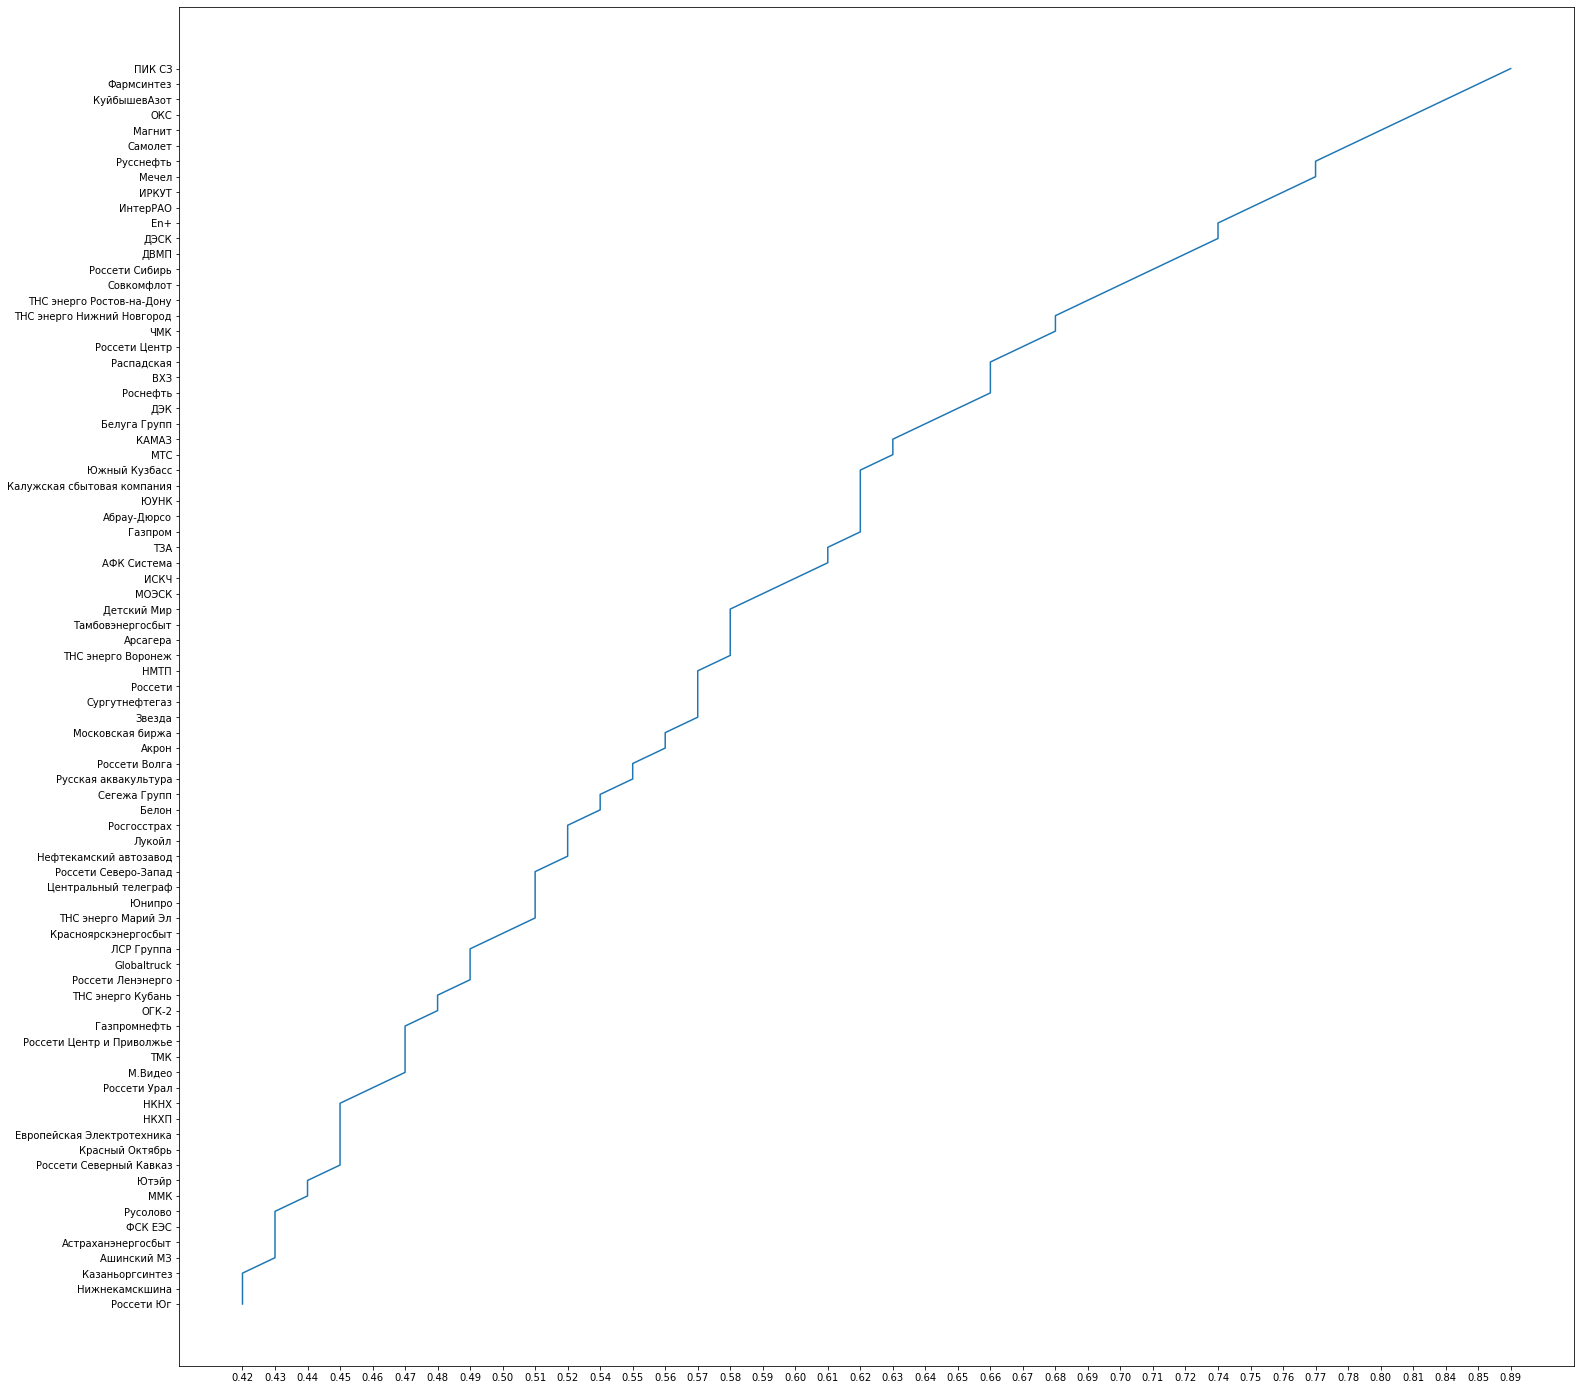

In [35]:
data_sup = df.where(df['Бета 1 г.'].astype(float) < 0.9)
data_sup = data_sup.dropna()
plt.figure(figsize=(25, 25))
plt.plot(data_sup.sort_values(by='Бета 1 г.')['Бета 1 г.'], data_sup.sort_values(by='Бета 1 г.')['Название'])
#data_sup

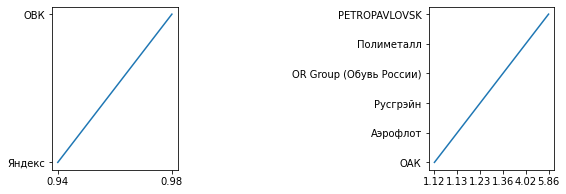

In [15]:
data_sup_1 = df.where(df['Бета 1 г.'].astype(float) > 0.9)
data_sup_1 = data_sup_1.where(data_sup_1['Бета 1 г.'].astype(float) < 1.1)
data_sup_1 = data_sup_1.dropna()
data_sup_2 = df.where(df['Бета 1 г.'].astype(float) > 1.1)
data_sup_2 = data_sup_2.dropna()
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
plt.subplots_adjust(wspace=2, hspace=1)
axs[0].plot(data_sup_1.sort_values(by='Бета 1 г.')['Бета 1 г.'], data_sup_1.sort_values(by='Бета 1 г.')['Название'])
axs[1].plot(data_sup_2.sort_values(by='Бета 1 г.')['Бета 1 г.'], data_sup_2.sort_values(by='Бета 1 г.')['Название'])

In [ ]:

plt.figure(figsize=(30, 10))
sns.countplot(x='Бета 1 г.', data=df.sort_values('Бета 1 г.'))


In [52]:
import plotly.express as px
df_1 = px.data.tips()

fig = px.scatter(df, x=df.sort_values(by='Бета 1 г.')['Бета 1 г.'].to_list(), y=df.sort_values(by='Бета 1 г.')['P/E'].to_list(),
                 text=df.sort_values(by='Бета 1 г.')['Название'].to_list())
fig.update_traces(textposition='bottom right')
fig.update_layout(
    height=1200,

)
fig.show()